In [1]:

# Auto-Decoder --> freezed version

# In this notebook AutoDecoders are explained by a simple example. The user can
# consider squares or circles (black) inside a box. Then the autodecoder with only one 
# code (code with size=1) can help you learn each shape inside the box. Example:
# if I choose square black boxes, the classes are square black boxes with size (radius here)
# 1, 2, ...box_size/2. So, now I have some classes that have balck boxes of size=1, 2,... (each class).
# the code for each of these classes are different. class 1 (square balck with size=1) has code=0.1 (for 
# example) and class 2 has code=0.2 and ... . The weights however are trained each time through training. 
# For training the nn, for each coordinate of boxes I have x and y representing row or col in that box.
# x, y and code are forming inputs (3 elements/neurons). 

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import numpy as np

/home/sobhan/miniconda3/envs/ml-dl/lib/python3.9/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
from math import sqrt, floor

def box(radius=2, box_size=28):
    '''
    to put some solid boxes in plain white images
    returns image(s) with boxes on them with the radius defined for them
    Comment: radius is a misnormer here. I wanted to show a scale thing for box in image
    firstly I wrote a cricle function (not a box) that is why I left radius like this 
    '''
    
    if isinstance(radius, int):
        radius = np.array([radius])
    
    elif isinstance(radius, float):
        radius = np.array([floor(radius)])
        
    elif not isinstance(radius, np.ndarray):
        rads = np.array(radius)
        
    rads = np.array(radius)

    position = np.zeros((rads.size, box_size//2 * 2, box_size//2 * 2))
#     print(rads)
    for i, r in enumerate(rads):
        
        for  x in range(-box_size//2, box_size//2):
            for y in range(-box_size//2, box_size//2):
                if (x**2+y**2 - r**2 <0.1):
                    position[i, x+box_size//2 , y+box_size//2] =  1    
                
#                 if ((abs(x) - r) < 0.01 and (abs(y) - r) < 0.01 ):
#                     position[i, x+box_size//2 , y+box_size//2] = 1
                
    return   torch.from_numpy(position)
#     return  torch.from_numpy(position).flatten(start_dim=1)
    

In [4]:
box(radius=1, box_size=6)

tensor([[[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0.],
         [0., 0., 1., 1., 1., 0.],
         [0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 0.]]], dtype=torch.float64)

In [5]:
box_siz = 30
num_samples = 3000 
half_box_siz = box_siz//2
box_siz = half_box_siz * 2 # updating box size (now it is not an odd number)

In [6]:
def func(num, divider):
    return num//divider + 1
l1 =  np.arange(num_samples)

In [7]:
# you can use each of the followings for seeing how random number of class samples or fix number of
# class samples might affect the results. one very import factor for training here is to 
# have equal number of samples in each class. Just uncomment the line and comment the other one.

# rand_radious = torch.randint(1, centralbox_size+1, (num_samples,)) # create a random array of raduis 
rand_radious = torch.tensor(list(map(func, l1, [num_samples//half_box_siz]*num_samples)))
features = box(radius=rand_radious, box_size=box_siz)  # data set

In [8]:
features.shape

torch.Size([3000, 30, 30])

In [9]:

# l2 =  np.arange(1,box_siz//2)

In [10]:
# rand_radious = torch.tensor(list(map(func, l1, [200//(box_siz//2)]*200)))

In [11]:
rand_radious

tensor([ 1,  1,  1,  ..., 15, 15, 15])

In [12]:
#  np.unique(features, axis=0).shape

In [13]:
# select unique data samples only
# features = torch.from_numpy(np.unique(features, axis=0))#.shape

In [14]:
half_box_siz+1

16

In [15]:
features.shape

torch.Size([3000, 30, 30])

In [16]:
rand_radious

tensor([ 1,  1,  1,  ..., 15, 15, 15])

In [17]:
rand_radious/rand_radious.max()

tensor([0.0667, 0.0667, 0.0667,  ..., 1.0000, 1.0000, 1.0000])

In [18]:
# rand_radious[10]/rand_radious.max()

In [19]:
features[2]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.

In [20]:
features.shape

torch.Size([3000, 30, 30])

In [21]:
# for i in range(features.shape[0]):
#     print(features[i].sum())

In [22]:
# random code
# code = torch.randint(1, 5, (features.shape[0],2))

In [23]:
# for i in range(features.shape[0]):
#     code [i, 0] = features[i].sum()
#     code [i, 1] = features[i].sum()    
#     code [i, 0] = features[i].sum()
#     code [i, 1] = features[i].sum()

In [24]:
# random code
code = torch.randint(1, 5, (features.shape[0],1))

In [25]:
# for i in range(features.shape[0]):
code  = rand_radious/rand_radious.max()
    
#     print(rand_radious[i]/rand_radious.max() )
#     code [i, 0] = features[i].sum()
#     code [i, 1] = features[i].sum()

In [26]:
code.shape

torch.Size([3000])

In [27]:
code[0:]

tensor([0.0667, 0.0667, 0.0667,  ..., 1.0000, 1.0000, 1.0000])

In [28]:
# features = features/features.shape[1]

In [29]:
features.shape[0]

3000

In [30]:
# code  = code/code.max()

In [31]:
code

tensor([0.0667, 0.0667, 0.0667,  ..., 1.0000, 1.0000, 1.0000])

In [32]:
features[0]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.

In [33]:
temp_features = features

In [34]:
temp_features.shape

torch.Size([3000, 30, 30])

In [35]:
features[0]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.

In [36]:
features = torch.zeros(temp_features.shape[0]*temp_features.shape[1]* temp_features.shape[2], 2+1)
labels = torch.zeros(temp_features.shape[0]*temp_features.shape[1]* temp_features.shape[2])

In [37]:
features.shape

torch.Size([2700000, 3])

In [38]:
x = torch.tensor([1,2,3])
torch.cat((x, x), axis=0)

tensor([1, 2, 3, 1, 2, 3])

In [39]:
(temp_features.shape[1])

30

In [40]:
count = 0 
for i in range(temp_features.shape[0]):
    for j in range(temp_features.shape[1]):
        for k in range(temp_features.shape[2]):
            features[count] = torch.cat((torch.tensor([j,k])/temp_features.shape[1],  torch.tensor([code[i]])), axis=0)
            labels[count] = temp_features[i][j][k]
            count += 1
#             print(temp_features[i])


In [41]:
features.shape, labels.shape

(torch.Size([2700000, 3]), torch.Size([2700000]))

In [42]:
features[1065], labels[1065]

(tensor([0.1667, 0.5000, 0.0667]), tensor(0.))

In [43]:
# for feature in features:
#     print(feature)
    


In [44]:
# labels[1450]

In [45]:
# from itertools import permutations
# for i,j, k  in permutations(range(0, 3)):
#     print(i,j,k)

In [46]:
# m = nn.LogSoftmax(dim=1)


In [47]:
# dict(code,features)

In [48]:
input_dim = 2
hidden_dim = 50

In [49]:
# defining dropout_layer
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # In this case, all elements are dropped out
    if dropout == 1:
        return torch.zeros_like(X)
    # In this case, all elements are kept
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

In [50]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        is_training = True
#         self.func1 = nn.Linear(input_dim + code.shape[1], hidden_dim)
        self.func1 = nn.Linear(input_dim + 1, hidden_dim)

        self.func2 = nn.Linear(hidden_dim, hidden_dim)
        self.func3 = nn.Linear(hidden_dim, hidden_dim)
        self.func4 = nn.Linear(hidden_dim, hidden_dim)
        self.func5 = nn.Linear(hidden_dim, 1)
        
        self.outp = nn.ReLU()
        
                
                
    def forward(self, x):
#         z = torch.cat((x, code_), axis=0)
        z = nn.functional.relu(self.func1(x.float()))
#         return self.outp(self.func5(z))
            # Use dropout only when training the model
        if self.training == True:
            # Add a dropout layer after the first fully connected layer
            z = dropout_layer(z, dropout=0.080)
#         return self.outp(self.func5(z))    
        z = nn.functional.relu(self.func2(z.float()))
        
        if self.training == True:
            # Add a dropout layer after the first fully connected layer
            z = dropout_layer(z, dropout=0.10)
        
        z = nn.functional.relu(self.func3(z))
        
        if self.training == True:
            # Add a dropout layer after the first fully connected layer
            z = dropout_layer(z, dropout=0.10)
        
        z = nn.functional.relu(self.func4(z))
        
        if self.training == True:
            # Add a dropout layer after the first fully connected layer
            z = dropout_layer(z, dropout=0.10)
        
        z = self.func5(z)
#         z = self.func5(z)
        
        
        return self.outp(z)

In [51]:
model = Model()

In [52]:
a = torch.tensor([1,2,3, 4])
b = torch.tensor([1,2,3])

In [53]:
code[0]

tensor(0.0667)

In [54]:
# features[1250]

In [55]:
model(features[1])

tensor([0.], grad_fn=<ReluBackward0>)

In [56]:
torch.cat((a, b), axis=0)

tensor([1, 2, 3, 4, 1, 2, 3])

In [57]:
from torch.utils import data

def load_array(data_arrays, batch_size, is_train=True): #@save
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [58]:
# for i in range(features[0].shape[0]):
#     for j in range(features[0].shape[1]):
#         print(model(features[0][i][j]))

In [59]:
train_x = features[:-features.shape[0]*20//100]
test_x  = features[-features.shape[0]*20//100:]
train_y = labels[:-labels.shape[0]*20//100]
test_y  = labels[-labels.shape[0]*20//100:]

batch_size = test_x.shape[0]

print(f'train size= {train_x.shape}, test size= {test_x.shape}, batch size= {batch_size}')
print(f'train size= {train_y.shape}, test size= {test_y.shape}, batch size= {batch_size}')
train_loader = load_array((train_x, train_y), batch_size)
test_loader  = load_array((test_x, test_y), batch_size)

train size= torch.Size([2160000, 3]), test size= torch.Size([540000, 3]), batch size= 540000
train size= torch.Size([2160000]), test size= torch.Size([540000]), batch size= 540000


In [60]:
model.parameters()

<generator object Module.parameters at 0x7f48c9a89740>

In [61]:
# hyperparameters
# input_dim = (box_siz//2 * 2)**2
# hidden_dim = 400
# latent_dim = 20
# output_dim = input_dim

lr = 2e-2

epochs = 300
DEVICE = 'cpu'
print_step = 50

In [62]:
# features[:-20].shape, features[-20:].shape

In [63]:
# we want to allow only 20% of data for test and the rest on training data
features.shape[0]*20//100

540000

In [64]:
# 80% for traning test, and 20% for test


In [65]:
train_x.shape, test_x.shape

(torch.Size([2160000, 3]), torch.Size([540000, 3]))

In [66]:
# """
#     A simple implementation of Gaussian MLP Encoder and Decoder
# """

# class Encoder(nn.Module):
    
#     def __init__(self, input_dim, hidden_dim, latent_dim):
#         super(Encoder, self).__init__()

#         self.FC_input = nn.Linear(input_dim, hidden_dim)
#         self.FC_input2 = nn.Linear(hidden_dim, hidden_dim)
#         self.FC_mean  = nn.Linear(hidden_dim, latent_dim)
#         self.FC_var   = nn.Linear (hidden_dim, latent_dim)
        
#         self.LeakyReLU = nn.LeakyReLU(0.2)
        
#         self.training = True
        
#     def forward(self, x):
#         h_       = self.LeakyReLU(self.FC_input(x))
#         h_       = self.LeakyReLU(self.FC_input2(h_))
#         mean     = self.FC_mean(h_)
#         log_var  = self.FC_var(h_)                     # encoder produces mean and log of variance 
#                                                        #             (i.e., parateters of simple tractable normal distribution "q"
        
#         return mean, log_var

In [67]:

# class Decoder(nn.Module):
#     def __init__(self, latent_dim, hidden_dim, output_dim):
#         super(Decoder, self).__init__()
#         self.FC_hidden = nn.Linear(latent_dim, hidden_dim)
#         self.FC_hidden2 = nn.Linear(hidden_dim, hidden_dim)
#         self.FC_output = nn.Linear(hidden_dim, output_dim)
        
#         self.LeakyReLU = nn.LeakyReLU(0.2)
        
#     def forward(self, x):
#         h     = self.LeakyReLU(self.FC_hidden(x))
#         h     = self.LeakyReLU(self.FC_hidden2(h))
        
#         x_hat = torch.sigmoid(self.FC_output(h))
#         return x_hat

In [68]:
# This took me a while to understand it.
# z[i]= mu[i]+eps[i]*std[i]   for decoder 
# see bellow:

<!-- ![image](VAE.jpg) -->

In [69]:
# class Model(nn.Module):
#     def __init__(self, Encoder, Decoder):
#         super(Model, self).__init__()
#         self.Encoder = Encoder
#         self.Decoder = Decoder
        
#     def reparameterization(self, mean, var):
#         epsilon = torch.randn_like(var).to(DEVICE)        # sampling epsilon        
#         z = mean + var*epsilon                          # reparameterization trick
#         return z
        
                
#     def forward(self, x):
#         mean, log_var = self.Encoder(x)
#         z = self.reparameterization(mean, torch.exp(0.5 * log_var)) # takes exponential function (log var -> var)
#         x_hat            = self.Decoder(z)
        
#         return x_hat, mean, log_var




In [70]:
# encoder = Encoder(input_dim=input_dim, hidden_dim=hidden_dim, latent_dim=latent_dim)
# decoder = Decoder(latent_dim=latent_dim, hidden_dim = hidden_dim, output_dim = output_dim)

# model = Model(Encoder=encoder, Decoder=decoder).to(DEVICE)


In [71]:
# model(features[0].float())

# Defining loss function

In [72]:
def clamp(a, b):
#     a = torch.tensor(x)
#     b = torch.tensor(delta)
    return torch.min(b, torch.max(-b, a))

In [73]:
a = torch.tensor([-1, 5, 1.2, 2])
b = torch.tensor([1.2])
clamp(a, b)

tensor([-1.0000,  1.2000,  1.2000,  1.2000])

In [74]:
torch.max(b, a)

tensor([1.2000, 5.0000, 1.2000, 2.0000])

In [75]:


# from torch.optim import Adam

# BCE_loss = nn.BCELoss()

# def loss_function(x, x_hat, mean, log_var):
#     reproduction_loss = nn.functional.binary_cross_entropy(x_hat.float(), x.float(), reduction='sum')
#     KLD      = - 0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())

#     return reproduction_loss + KLD


# optimizer = Adam(model.parameters(), lr=lr)



# Training

In [76]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)

In [77]:
# torch.randn(3, 5).softmax(dim=1), torch.randn(3, 5)

In [78]:
# loss = nn.CrossEntropyLoss(reduction='none')
# def loss(y_hat, y):
#     return (y_hat-y).sum()
loss = nn.MSELoss()
# loss = nn.CrossEntropyLoss()
# loss = nn.BCEWithLogitsLoss()


In [79]:
# num_epochs = 30
# for epoch in range(num_epochs):
#     for X,Y in train_loader:
#     #     print(X,Y)
# #         x = X.T
# #         y = Y
#         print(X.shape,Y.shape, model(X.float()).shape)
#         l = loss(model(X.float())[:,0], Y.float())
#         optimizer.zero_grad()
#         l.backward()
#         optimizer.step() #optimizer
# #     l = loss(model(x_truth.float()), y_truth.float())
# #     print(f'epoch {epoch + 1}, loss {l:f}')

In [80]:

print("Start training ...")
model.train()

for epoch in range(30):
    overall_loss = 0
    for batch_idx, (x, y) in enumerate(train_loader):
#         x = x.view(batch_size, x_dim)
        x = x.to(DEVICE)

        optimizer.zero_grad()

#         x_hat, mean, log_var = 
        y_hat = model(x.float()).float()
#         y_hat = y_hat.reshape(-1)
#         y = y.reshape(-1)
#         print(x.shape, y_hat.shape, y.shape)
#         print(y_hat, y)
#         y_hat = y_hat.type(torch.LongTensor)

        l = loss(y_hat.flatten(), y.float().flatten())
#         l = torch.sum(torch.abs(clamp(y_hat.flatten(), torch.tensor([1])) - clamp(y.float().flatten(), torch.tensor([1]))))
#         print(l)
        overall_loss += l.item()
        
        l.backward()
        optimizer.step()
        
    print("\tEpoch", epoch + 1, "complete!", "\tAverage Loss: ", overall_loss / (batch_idx*batch_size))
    print(overall_loss)
    
print("Finish!!")


Start training ...
	Epoch 1 complete! 	Average Loss:  4.574835944322892e-07
0.7411234229803085
	Epoch 2 complete! 	Average Loss:  3.928670452700721e-07
0.6364446133375168
	Epoch 3 complete! 	Average Loss:  3.7597371840182643e-07
0.6090774238109589
	Epoch 4 complete! 	Average Loss:  3.5500162177615693e-07
0.5751026272773743
	Epoch 5 complete! 	Average Loss:  3.0721409453286063e-07
0.49768683314323425
	Epoch 6 complete! 	Average Loss:  2.701114863157272e-07
0.4375806078314781
	Epoch 7 complete! 	Average Loss:  2.2651466230551402e-07
0.3669537529349327
	Epoch 8 complete! 	Average Loss:  1.9307805248248723e-07
0.31278644502162933
	Epoch 9 complete! 	Average Loss:  1.6205130535879254e-07
0.2625231146812439
	Epoch 10 complete! 	Average Loss:  1.3790090832813286e-07
0.22339947149157524
	Epoch 11 complete! 	Average Loss:  1.2514859116003838e-07
0.20274071767926216
	Epoch 12 complete! 	Average Loss:  1.1056719324838968e-07
0.17911885306239128
	Epoch 13 complete! 	Average Loss:  1.02968833604712

In [81]:
# list(model.named_parameters())

In [82]:
# a = torch.tensor([0.01, 0.12, 0.72, 0.74])
# model(a)

In [83]:
import matplotlib.pyplot as plt
import numpy as np

In [84]:
test_sample = torch.zeros((box_siz, box_siz))

In [85]:
test_sample.shape, temp_features[0].shape, features[0]

(torch.Size([30, 30]), torch.Size([30, 30]), tensor([0.0000, 0.0000, 0.0667]))

In [129]:
for i in range(box_siz):
    for j in range(box_siz):
#         test_sample [i,j] = torch.tensor([i/10, j/10, 0.25,0.25])
        test_sample [i,j] = model(torch.tensor([i/box_siz, j/box_siz, 0.0667]))
#         model(torch.tensor([i, j, 0.8, 0.6]))

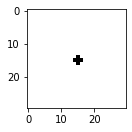

In [130]:
plt.subplot(211)
plt.imshow(temp_features[0].detach().numpy(), cmap='Greys')

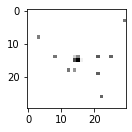

In [131]:
plt.subplot(222)
plt.imshow(test_sample.detach().numpy(), cmap='Greys')

In [122]:
test_sample

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7496, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6767,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.2584],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
       

In [90]:
# test_sample.shape, temp_features.shape

In [91]:
# plt.subplot(211)
# plt.imshow(test_sample.detach().numpy(), cmap='Greys')

In [92]:
for i in range(box_siz):
    for j in range(box_siz):
#         test_sample [i,j] = model(torch.tensor([i/10, j/10, 0.25,0.25]))
        test_sample [i,j] = model(torch.tensor([i/box_siz, j/box_siz, 0.41]))

In [93]:
test_sample.shape

torch.Size([30, 30])

In [94]:
test_sample.shape

torch.Size([30, 30])

In [95]:
features.shape

torch.Size([2700000, 3])

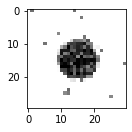

In [96]:
plt.subplot(211)
plt.imshow(test_sample.detach().numpy(), cmap='Greys')


# Generate new samples

In [97]:
# now taking decoder we can produce new data samples

In [98]:
with torch.no_grad():
    new_code = torch.linspace(0, 1, steps=50)
#     noise = torch.rand(10, 1).to(DEVICE)
#     model(torch.tensor())
#     generated_sample = model(noise)

In [99]:
new_code = new_code.reshape(-1, 1)

In [100]:
new_code.shape

torch.Size([50, 1])

In [101]:
# noise

In [102]:
box_siz//2 * 2

30

In [103]:
count = 0
generated_sample = torch.empty((new_code.shape[0], box_siz ** 2))
print(generated_sample.shape)
for c in new_code:
    for i in range(box_siz):
        for j in range(box_siz):
            test_sample [i,j] = model(torch.cat((torch.tensor([i/box_siz, j/box_siz]), c)))
    
#     print(test_sample.shape, test_sample.flatten().shape)
    generated_sample[count] = test_sample.flatten()
    count += 1
#     generated_sample = torch.cat((generated_sample, test_sample.flatten()), axis=0)

torch.Size([50, 900])


In [104]:
# noise.shape

In [105]:
generated_sample.shape

torch.Size([50, 900])

In [106]:
203/29

7.0

In [107]:
# generated_sample[0]

In [108]:
box_siz//2 *2

30

In [109]:
# plt.subplot(212)
# y = generated_sample[2].reshape(box_siz//2 *2,box_siz//2 *2).float()
# plt.imshow(y.detach().numpy(), cmap='Greys',  interpolation='nearest')

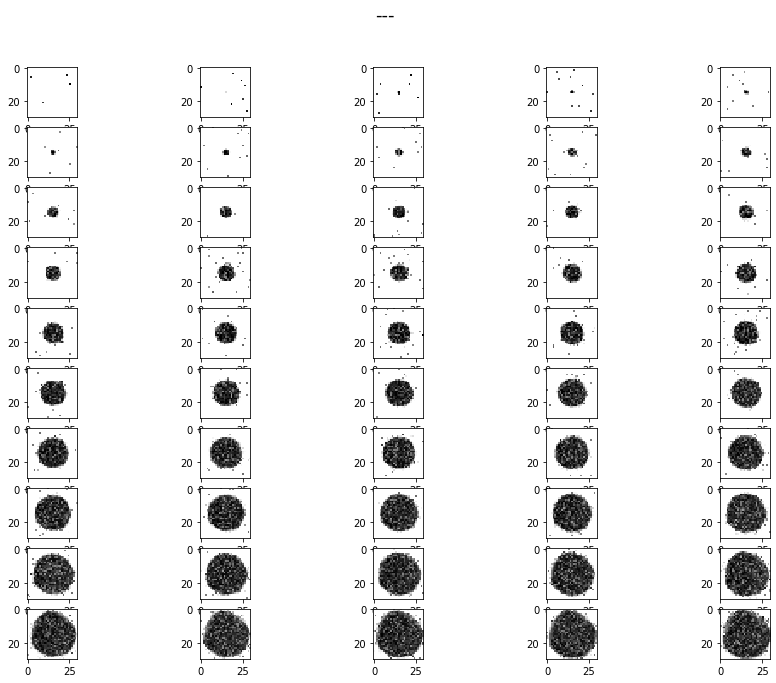

In [110]:
plt.figure(figsize=(15, 12))
# plt.subplots_adjust(hspace=0.2)
plt.suptitle("---", fontsize=18, y=0.95)

# set number of columns (use 3 to demonstrate the change)
ncols =5

nrows = new_code.shape[0]//ncols +1
if (nrows==0):
    nrows =1
    
for idx, sample in enumerate (generated_sample):
#     print(sample.shape)
    ax = plt.subplot(nrows, ncols, idx + 1)
    y = sample.reshape(box_siz, box_siz).float()

    plt.imshow(y.detach().numpy(), cmap='Greys',  interpolation='nearest')


In [132]:
new_code,

tensor([[0.0000],
        [0.0204],
        [0.0408],
        [0.0612],
        [0.0816],
        [0.1020],
        [0.1224],
        [0.1429],
        [0.1633],
        [0.1837],
        [0.2041],
        [0.2245],
        [0.2449],
        [0.2653],
        [0.2857],
        [0.3061],
        [0.3265],
        [0.3469],
        [0.3673],
        [0.3878],
        [0.4082],
        [0.4286],
        [0.4490],
        [0.4694],
        [0.4898],
        [0.5102],
        [0.5306],
        [0.5510],
        [0.5714],
        [0.5918],
        [0.6122],
        [0.6327],
        [0.6531],
        [0.6735],
        [0.6939],
        [0.7143],
        [0.7347],
        [0.7551],
        [0.7755],
        [0.7959],
        [0.8163],
        [0.8367],
        [0.8571],
        [0.8776],
        [0.8980],
        [0.9184],
        [0.9388],
        [0.9592],
        [0.9796],
        [1.0000]])

# comment

In [138]:
# dataset should be evenly splited with samples from each class. Random setting is not good, as you might
# not providing equal (sufficient) samples of one specefic class and over provide for another class.
# This produces bias for the training. To see this go up and uncomment the line.

# if you like to produce black square or circles you only need to edit box function on the top of 
# this notebook file.

# Adding more sample data was the best practice for accuracy. 
# For seeing the results it was best to choose a larger box size.

# adding dropout was a good practice.

# there are more than one loss functions I tested here. loss = nn.MSELoss() is the best
# loss = nn.BCEWithLogitsLoss() was not good. Don't know why.

# the problem here is that if we have 4 classed 0.1, 0.2, 0.3, 0.4 we know that 0.15 is a 
# new shape between class number 1 and class number 2. but the question is how can we interpolate a new
# class between class 0.4 and class 0.1? I'm not sure, maybe considering another dimension for 'codes' 
# can solve this.